In [8]:
import math as m
from astropy.io import fits
import numpy as np
import socket
from pylab import *
import scipy.misc as sp
%matplotlib inline
import urllib2
import matplotlib.pyplot as plt
from astroquery.vizier import Vizier
#result = Vizier.query_object('Barnard')
from astroquery.skyview import SkyView

all_surveys = []
survey_dict = SkyView.survey_dict
for wavelength in survey_dict:
    survey_list = survey_dict[wavelength]
    for survey in survey_list:
        #if(wavelength in ['UV','Optical:SDSS','OtherOptical','InfaredHighRes',
        #                 'Optical:DSS']):
        if(wavelength in ['Optical:SDSS','Optical:DSS']):
            all_surveys.append(survey.encode("utf-8"))







In [2]:
viz = Vizier(columns=['_RAJ2000', '_DEJ2000'])
cat_list = viz.find_catalogs('UCAC')
print cat_list
for key in cat_list:
    cat = cat_list[key]
    for table in cat.tables:
        print "."

{u'I/289': <astropy.io.votable.tree.Resource object at 0x00000000158E6198>, u'J/AJ/125/2728': <astropy.io.votable.tree.Resource object at 0x0000000015AD92E8>, u'III/272': <astropy.io.votable.tree.Resource object at 0x00000000159F7BE0>, u'I/322A': <astropy.io.votable.tree.Resource object at 0x000000001590D668>}
.
.
.
.


c:\Users\Leandra\Anaconda\lib\site-packages\astroquery\vizier\core.py:685: UserWarning: VOTABLE parsing raised exception: 
  warnings.warn("VOTABLE parsing raised exception: {0}".format(ex))


[[ 6254.  6254.  5776. ...,  6245.  6006.  6006.]
 [ 6733.  6733.  5776. ...,  6245.  6006.  6006.]
 [ 7047.  6568.  6329. ...,  6006.  5527.  6006.]
 ..., 
 [ 7340.  6862.  6383. ...,  5307.  5785.  6294.]
 [ 6802.  6802.  6324. ...,  6024.  6024.  6294.]
 [ 6324.  6324.  5845. ...,  6024.  6024.  6294.]]
254
254


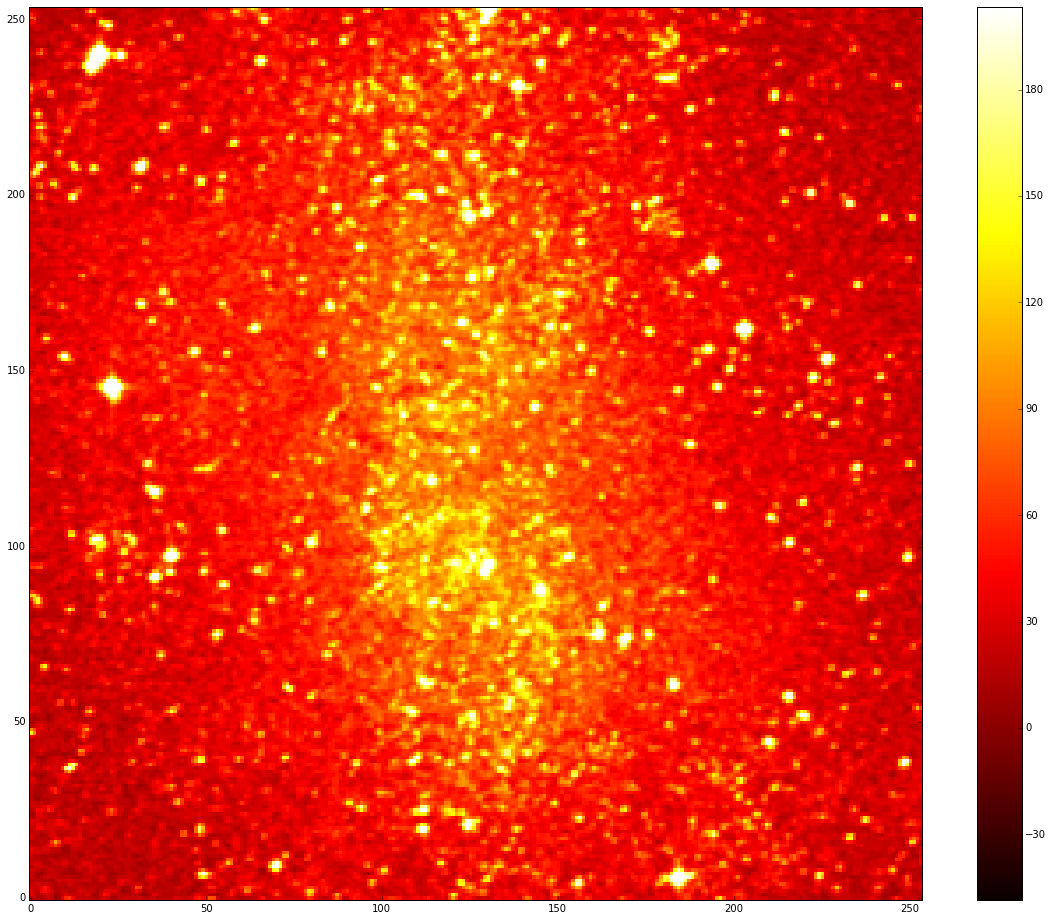

[[ 5709.  5972.  5841. ...,  4833.  5058.  5752.]
 [ 6009.  5897.  6066. ...,  5133.  5846.  5977.]
 [ 5709.  4959.  4828. ...,  5527.  5677.  5377.]
 ..., 
 [ 6083.  5670.  5370. ...,  5674.  5861.  5524.]
 [ 5708.  5895.  5595. ...,  5599.  5861.  5899.]
 [ 5258.  5333.  5258. ...,  5055.  4867.  5055.]]
254
254


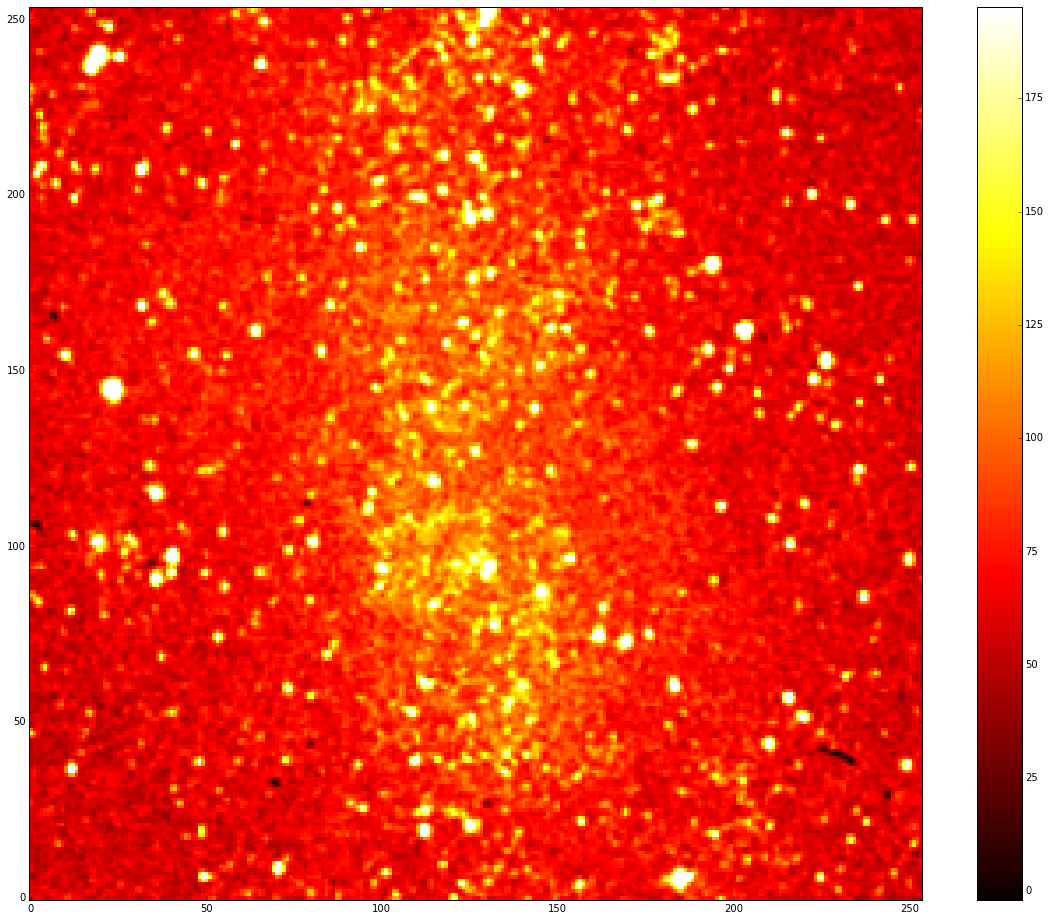

[[ 2451.  3291.  4131. ...,  4509.  3249.  2829.]
 [ 3291.  3291.  3711. ...,  3669.  3249.  3669.]
 [ 3501.  3081.  3081. ...,  3669.  2829.  2829.]
 ..., 
 [ 3656.  2816.  3236. ...,  2513.  2093.  2093.]
 [ 3236.  2816.  3236. ...,  2723.  2933.  2513.]
 [ 2396.  2816.  2816. ...,  3143.  3353.  2933.]]
254
254


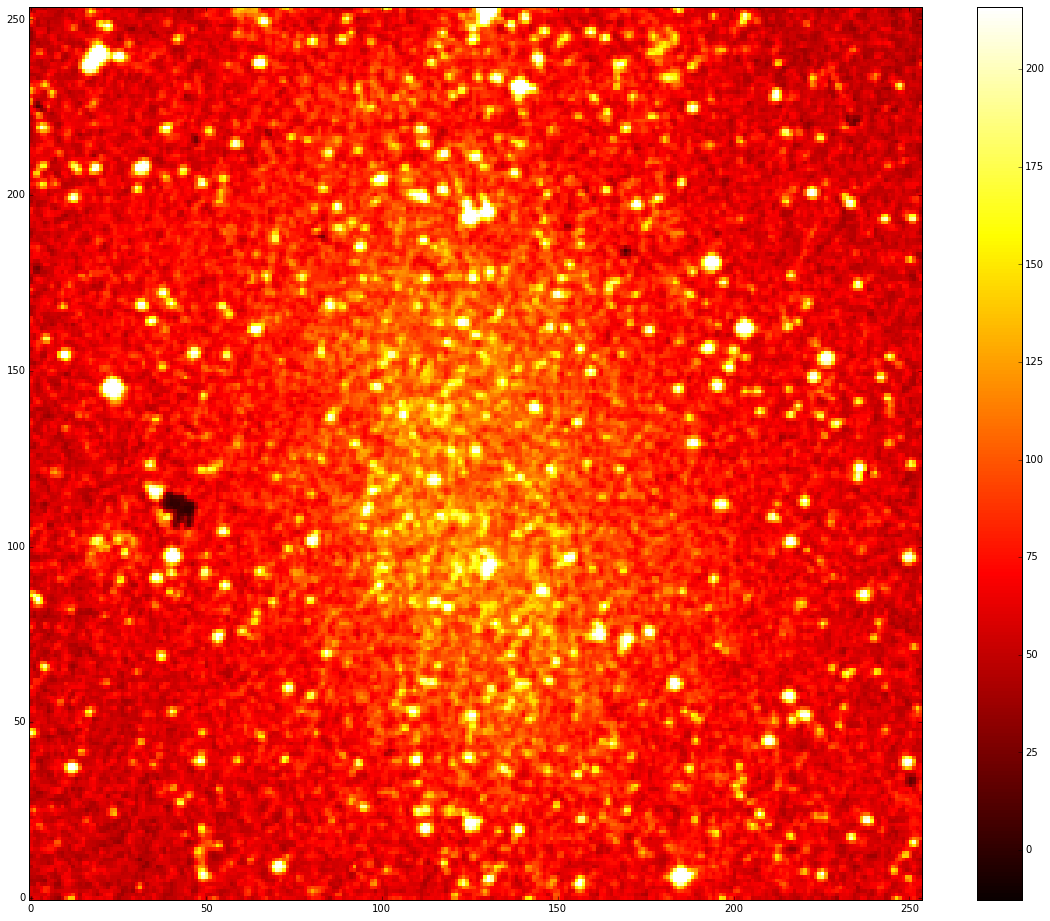

[[ 5977.  5977.  6352. ...,  6792.  7354.  8104.]
 [ 5884.  5977.  5977. ...,  6698.  7073.  7823.]
 [ 6071.  6165.  6165. ...,  6698.  6698.  7073.]
 ..., 
 [ 6765.  7890.  9108. ...,  6218.  6593.  6734.]
 [ 6577.  7702.  9296. ...,  5843.  6218.  6359.]
 [ 6671.  7608.  9390. ...,  5984.  5984.  6171.]]
149
149


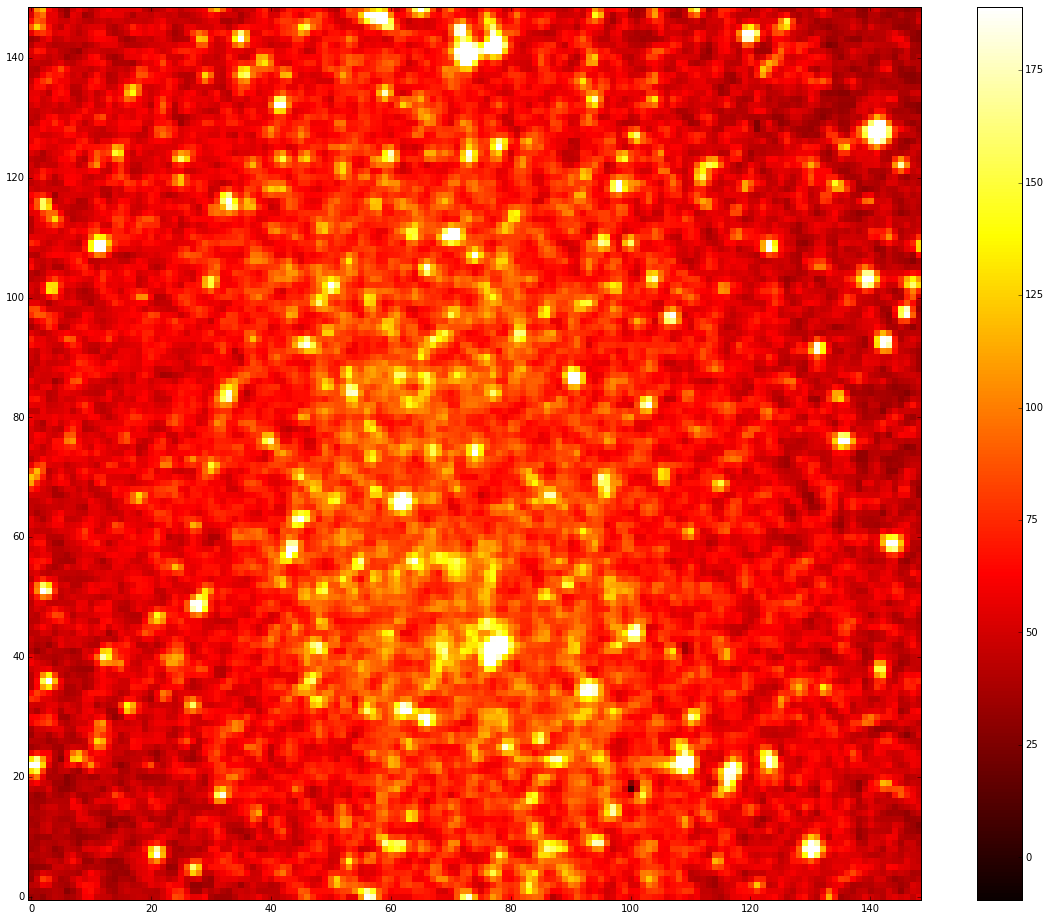

[[  7451.   7929.   7929. ...,   8152.   8152.   9587.]
 [  7451.   7929.   7929. ...,   7434.   7434.   8391.]
 [  6494.   6494.   6972. ...,   7434.   7434.   7434.]
 ..., 
 [  7789.   8866.  11737. ...,   6712.   6712.   6712.]
 [  7789.   8866.  11737. ...,   7191.   7191.   7191.]
 [  7430.   8985.  10899. ...,   7191.   7191.   7191.]]
149
149


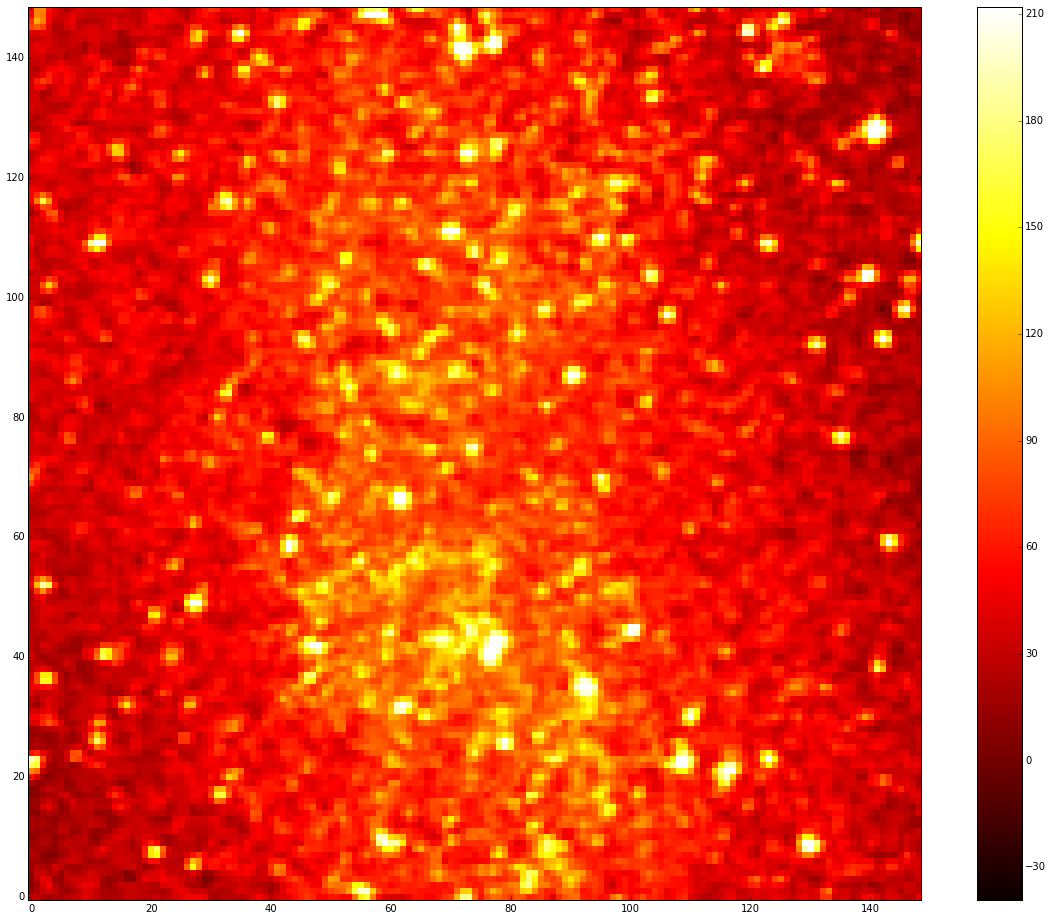

[[ 4912.  4887.  4887. ...,  5765.  5865.  5465.]
 [ 4812.  4787.  4787. ...,  5265.  5765.  5565.]
 [ 4812.  4987.  4987. ...,  5265.  5565.  5365.]
 ..., 
 [ 5046.  5121.  6121. ...,  4670.  4670.  4670.]
 [ 4846.  5321.  6321. ...,  4670.  4670.  4670.]
 [ 5246.  5321.  6121. ...,  4770.  4870.  4870.]]
149
149


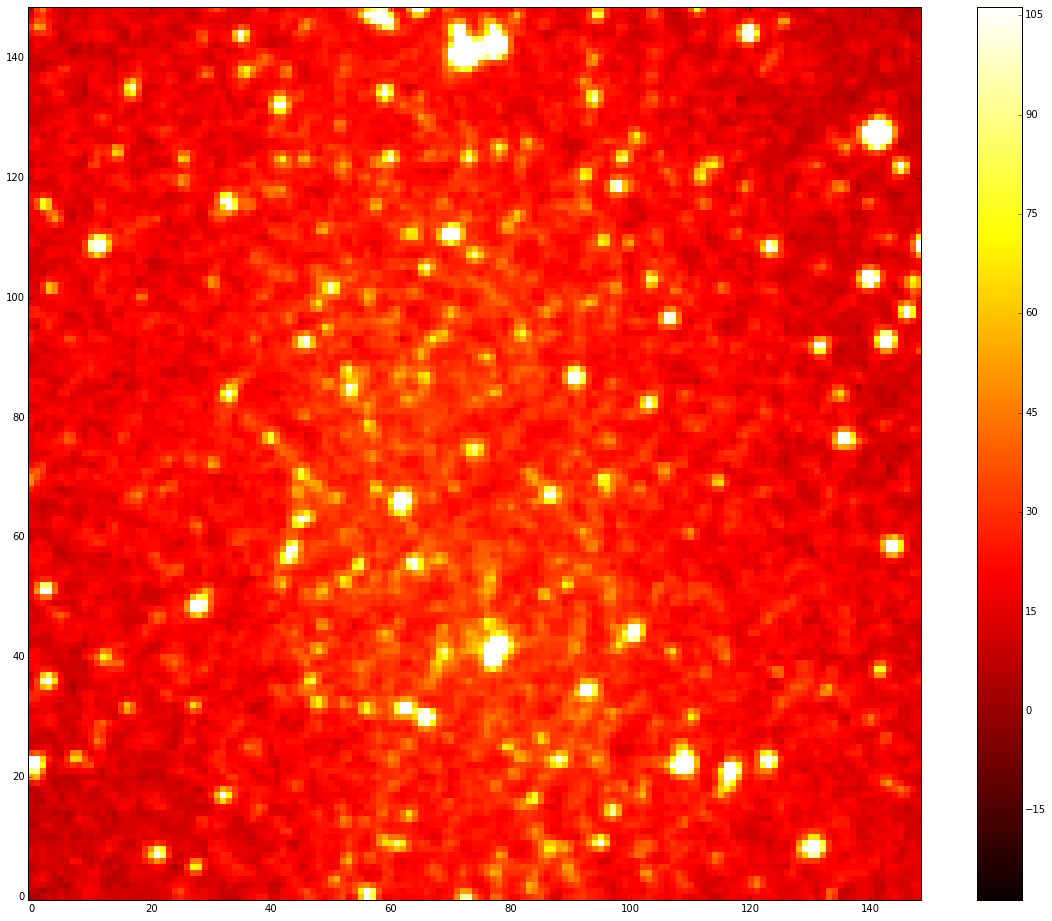

Error, skipping
Error, skipping
Error, skipping
Error, skipping
Error, skipping
Error, skipping
Error, skipping
Error, skipping
Error, skipping
Error, skipping


In [25]:
sv = SkyView()
def plotImage(hduData):
    matplotlib.rcParams['figure.figsize'] = (20, 16)

    img_median=np.median(hduData)
    img_std=np.std(hduData)
    #print 'Science image - median: ',img_median
    #print 'Science image - stddev: ',img_std
    fig, ax = plt.subplots()
    im = ax.imshow(hduData,cmap=plt.get_cmap('hot'), interpolation='nearest', origin='lower',\
    vmin=img_median-(3*img_std), vmax=img_median+(5*img_std))
    fig.colorbar(im)
    plt.show()
def imNorm(hduData):
    trim_mean=np.mean(hduData)
    hduData=hduData/trim_mean
    return(hduData)
def resizeImage(hdu, hdudata, img_arcmin):
    print hdudata
    header = hdu.header
    width_pixel = header['NAXIS1']
    height_pixel = header['NAXIS2']
    xscale = abs(header['CDELT1'])
    yscale = abs(header['CDELT2'])
    width_arc = int(width_pixel*xscale*img_arcmin*60)
    height_arc = int(height_pixel*yscale*img_arcmin*60)
    print width_arc
    print height_arc
    resized = sp.imresize(hdudata, (width_arc,height_arc), interp="cubic")
    return resized
image_stack = []
for indiv in all_surveys:
    try:
        paths = sv.get_images(position='Barnard', \
                        survey=indiv)
    except:
        print "Error, skipping"
        continue
    for hdulist in paths:
        for hdu in hdulist:
            header = hdu.header
            #print header['CRVAL1']
            #print header['CRVAL2']
            normalized = imNorm(hdu.data)
            resized = resizeImage(hdu, hdu.data, 30)
            image_stack.append(resized)
            plotImage(resized)
            #data[150:160, 150:160] #[range in y, range in x]


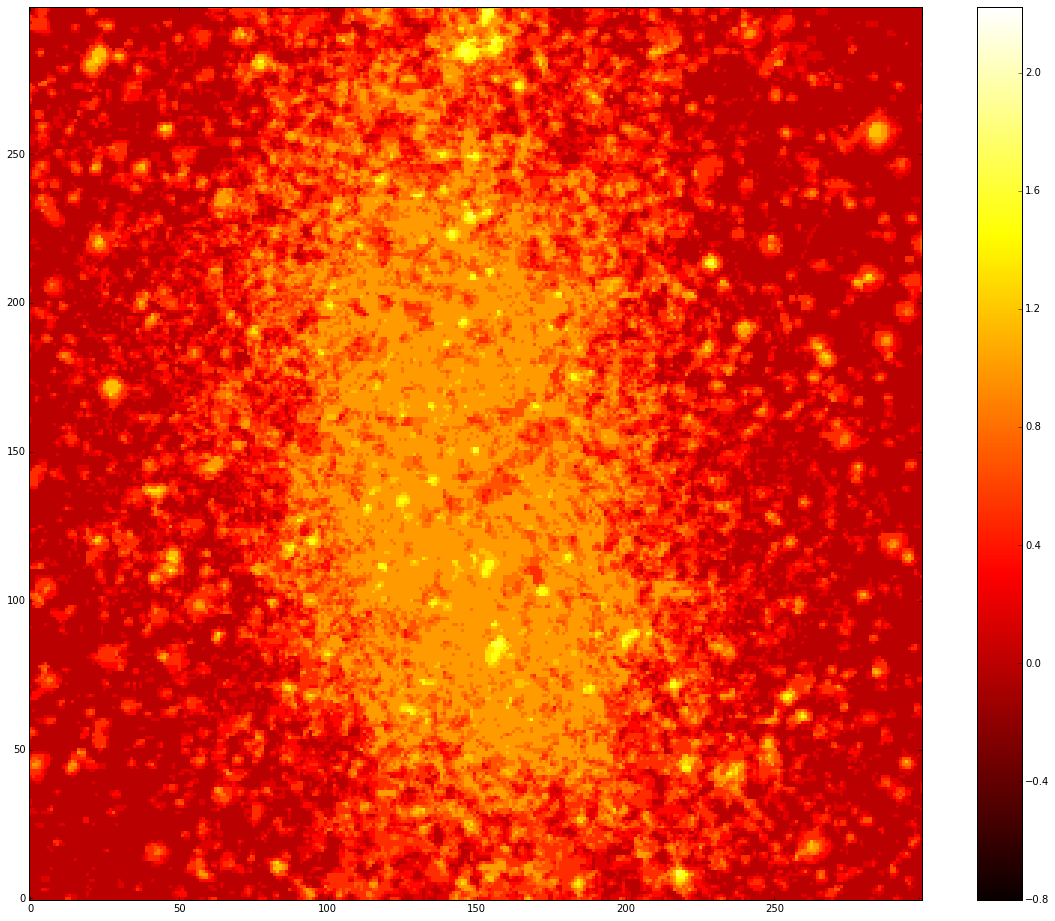

In [17]:
nx = 300
ny = 300

final_array = np.zeros((ny,nx,len(image_stack)),dtype='uint64')
for i in range(0, len(image_stack)):
  final_array[:,:,i] =  image_stack[i]

final_image = np.mean(final_array.astype(dtype='float32'),axis=2)
plotImage(final_image)